<a href="https://colab.research.google.com/github/M-Jak/Finki/blob/main/Vnp/Lab_2_od_terminot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


# Laboratory Exercise - Run Mode (8 points)

## Introduction
The analysis of Spotify songs, characterized by a rich set of features such as danceability, energy, and valence, holds significant importance in the realm of music research, entertainment, and data-driven decision-making. Understanding the musical attributes of songs through data analysis provides valuable insights into user preferences, genre trends, and the overall landscape of the music industry. This type of analysis contributes to personalized recommendations for users, enhancing their music discovery experience. Moreover, it aids music producers and artists in tailoring their creations to align with popular trends and audience preferences. Additionally, the exploration of Spotify song data has the potential to uncover patterns, correlations, and anomalies that can inform marketing strategies, playlist curation, and even influence the strategic planning of music events. Overall, the analysis of Spotify songs is instrumental in leveraging data to enhance user experiences, guide artistic endeavors, and inform strategic decisions within the dynamic and ever-evolving music industry.

## The Spotify Songs Dataset

## Downloading the Spotify Songs Dataset

In [3]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_ # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 13.2MB/s]


## Exploring the Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [4]:
dataset = pd.read_csv('/content/MyDrive/MyDrive/VNP labs/Lab 2/Lab 2 termin/spotify-songs.csv')
dataset

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


Encode the target variable using the `LabelEncoder` from the `scikit-learn` library.

In [5]:
encoder = LabelEncoder()
encoder.fit(dataset['genre'])
dataset['genre'] = encoder.transform(dataset['genre'])
dataset

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'genre'}>, <Axes: >, <Axes: >]],
      dtype=object)

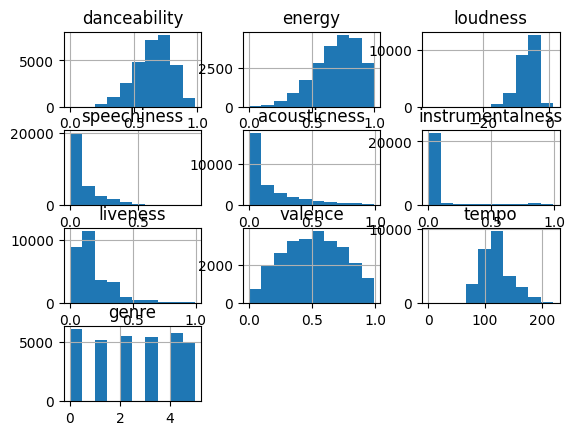

In [6]:
dataset.hist()

Check if the dataset is balanced.

<Axes: ylabel='Frequency'>

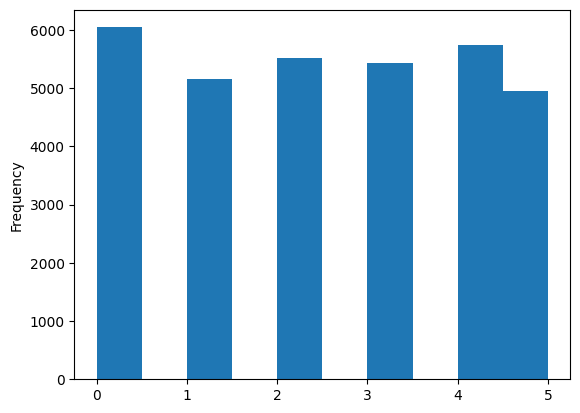

In [7]:
dataset.genre.plot.hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [8]:
dataset.isna().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [9]:
dataset.isna().sum() / len(dataset)

danceability        0.111534
energy              0.342978
loudness            0.232084
speechiness         0.071909
acousticness        0.027229
instrumentalness    0.197058
liveness            0.090945
valence             0.228094
tempo               0.199708
genre               0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

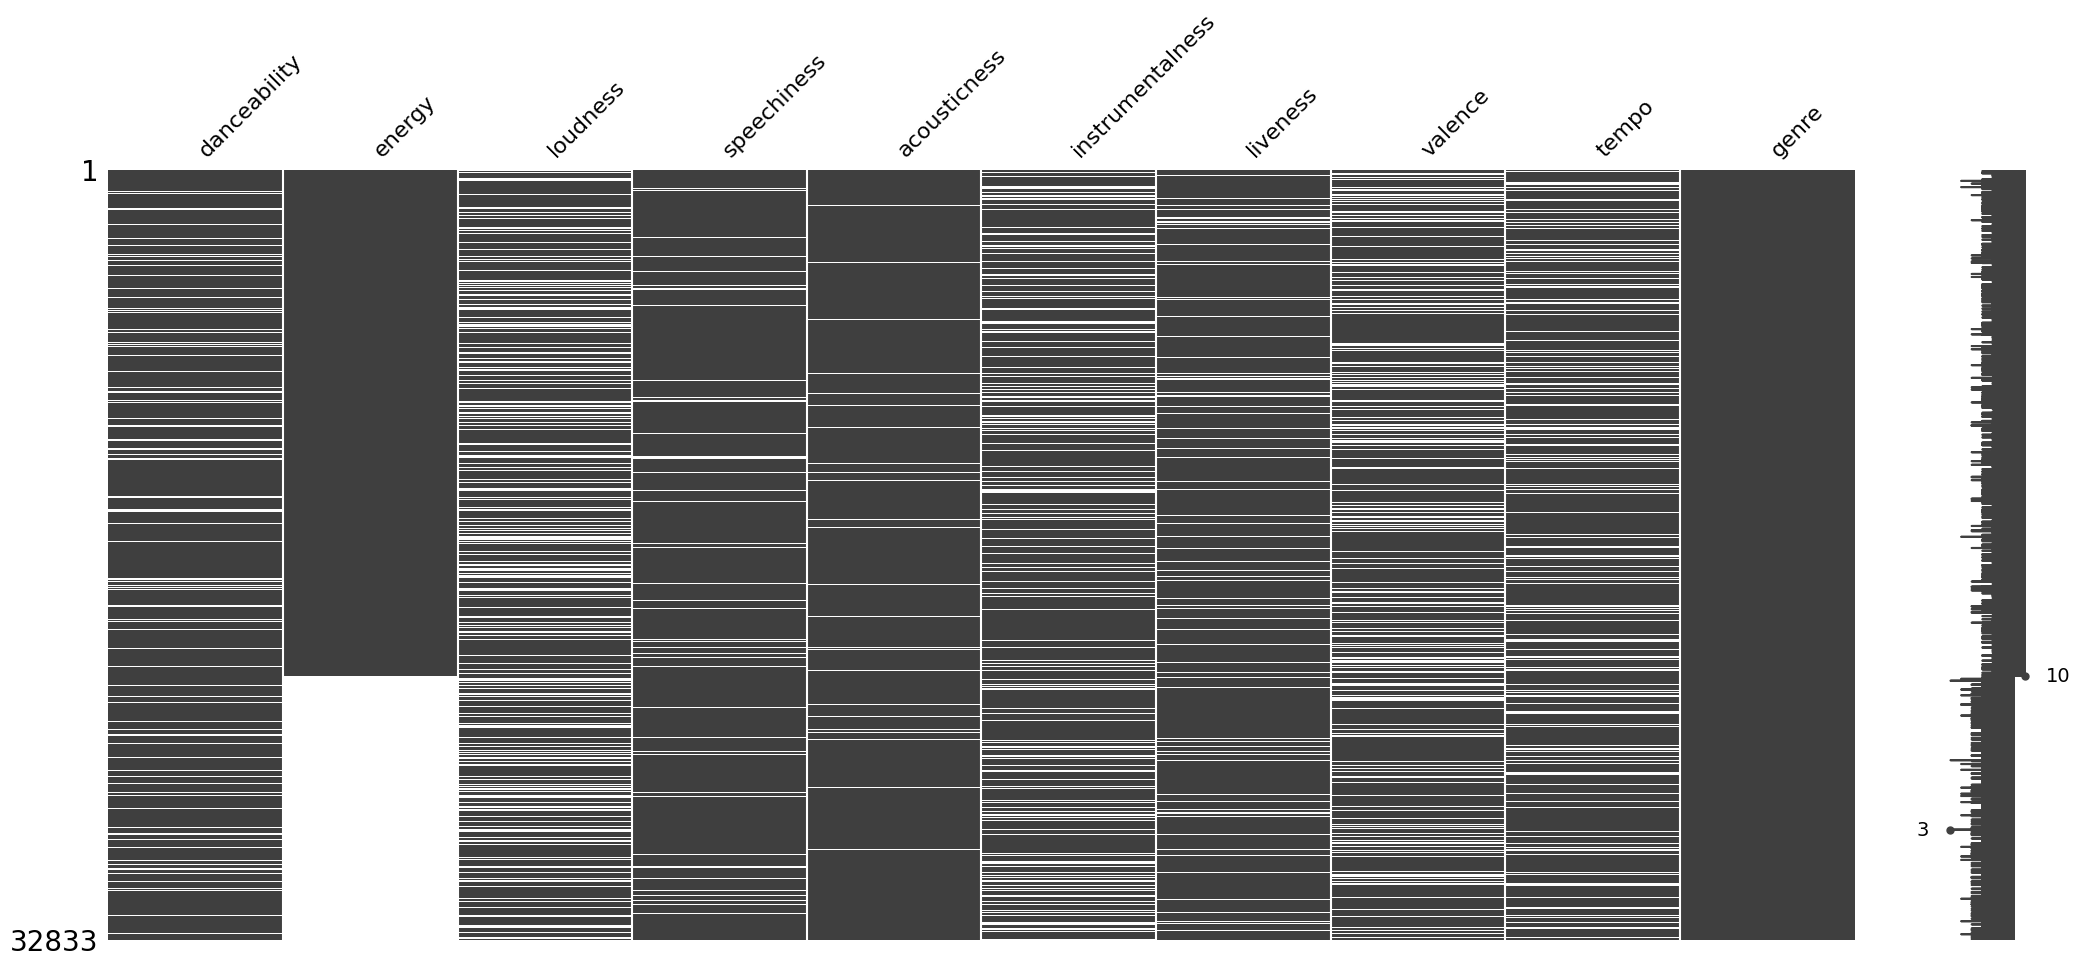

In [10]:
msno.matrix(dataset.sort_values('energy'))

<Axes: >

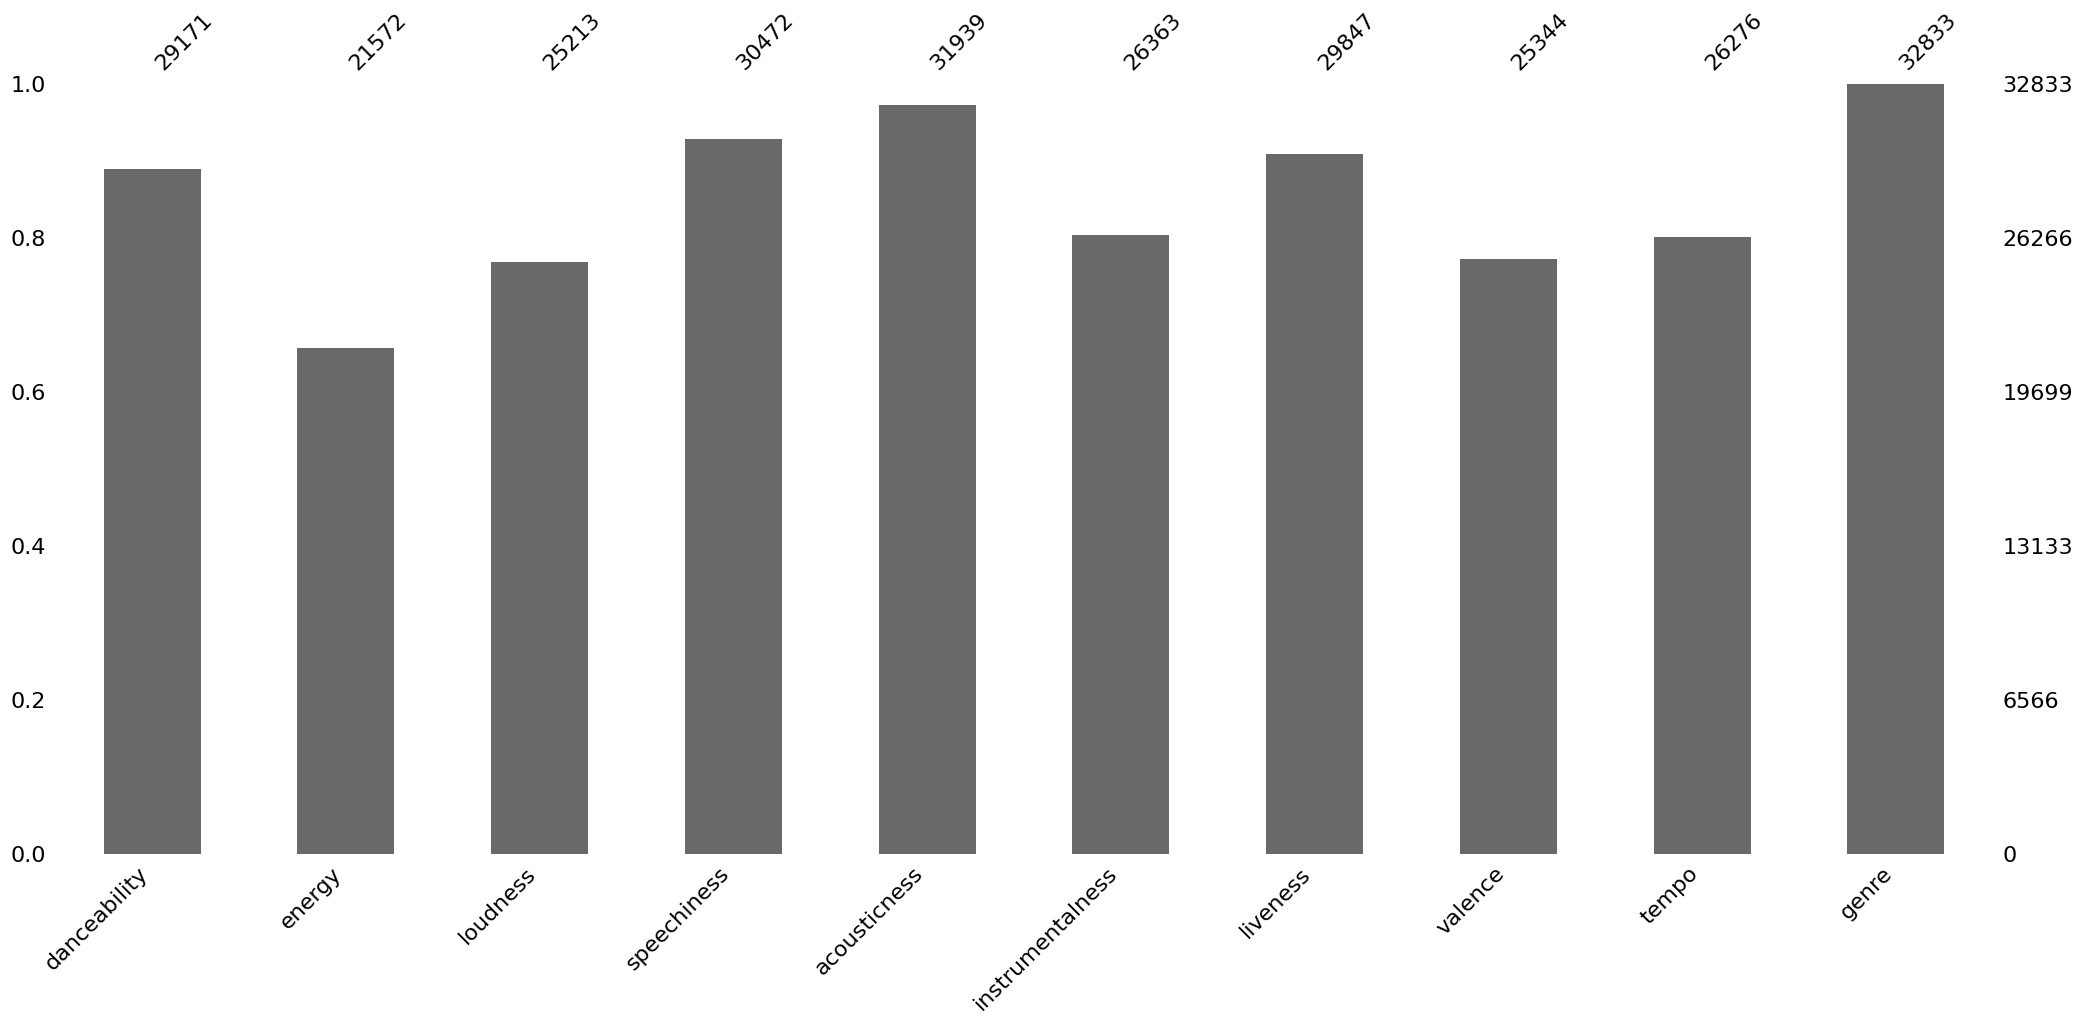

In [11]:
msno.bar(dataset)

<Axes: >

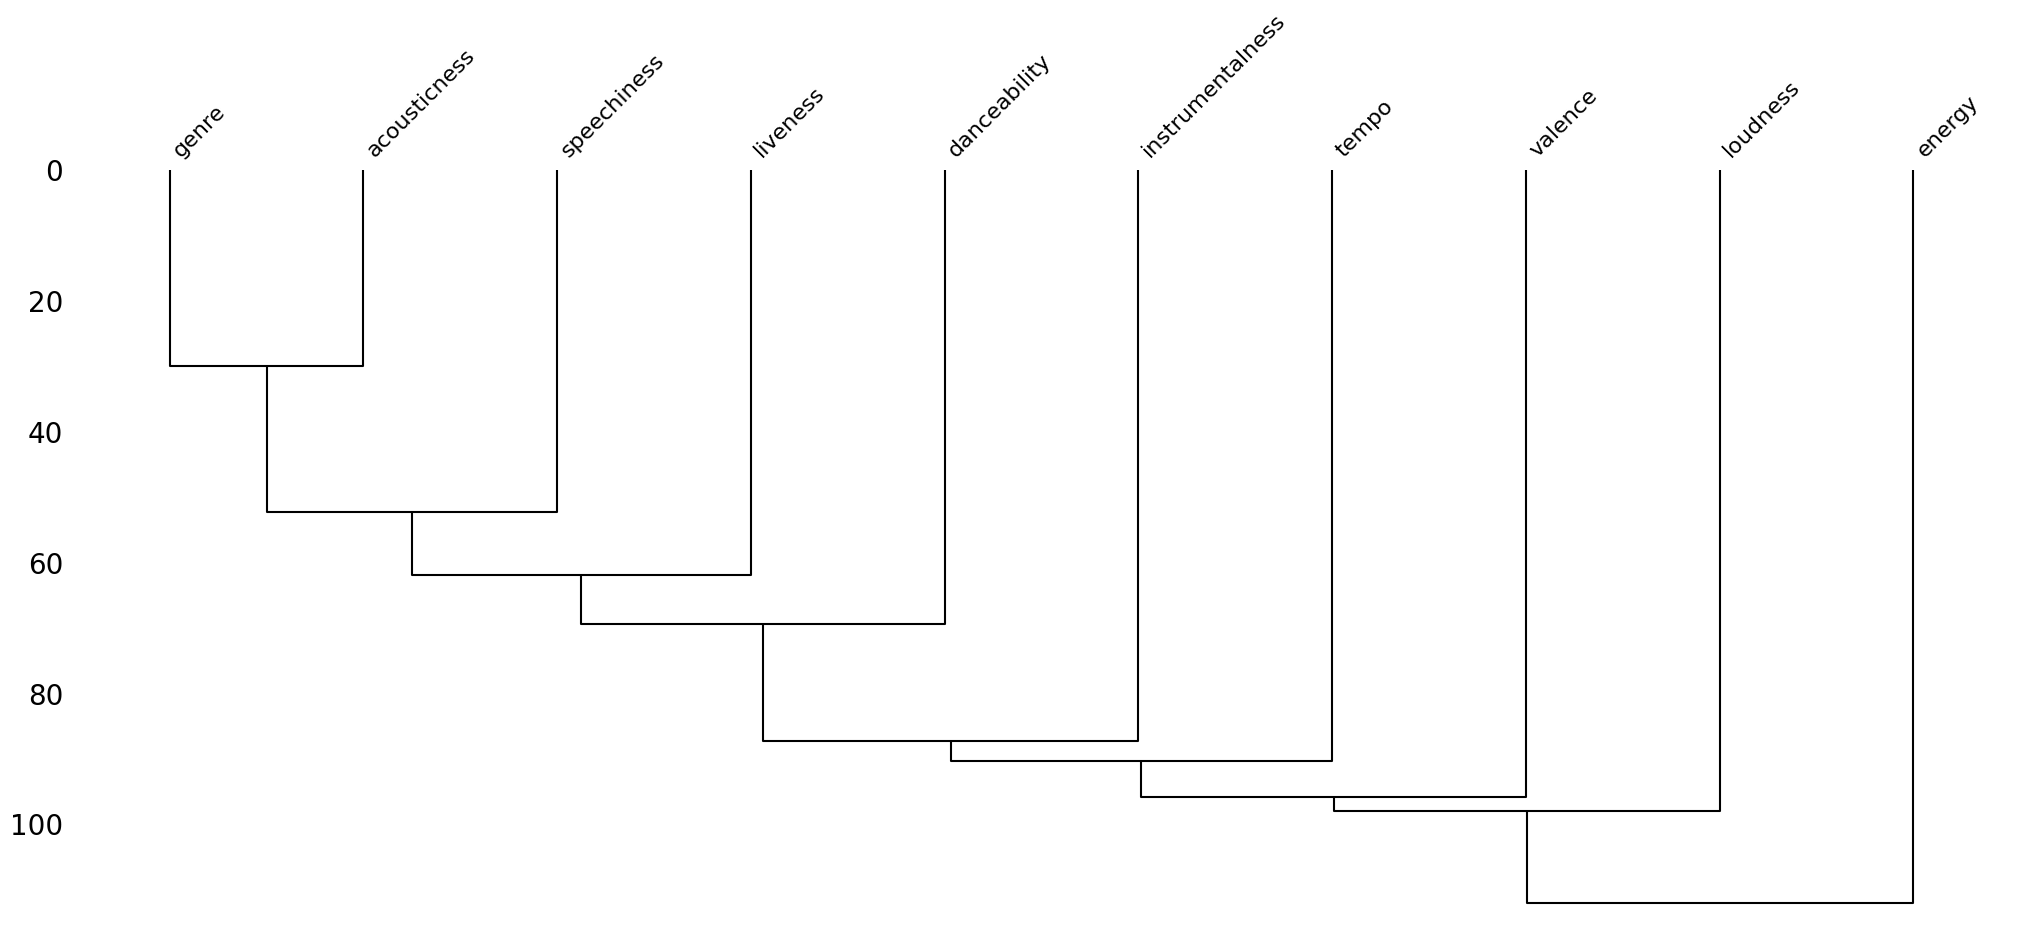

In [12]:
msno.dendrogram(dataset)

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(dataset)
plt.show()

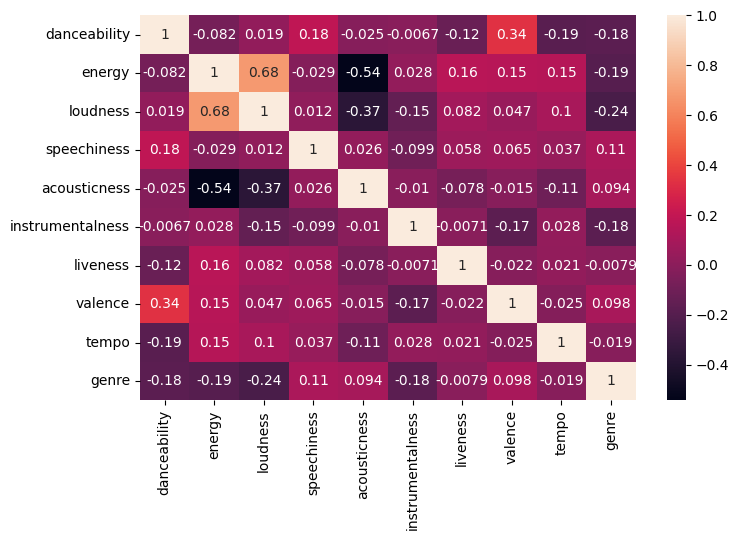

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [15]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

In [16]:
df1 = dataset.copy()

In [17]:
df1[['energy','loudness']] = imputer.fit_transform(df1[['energy','loudness']])
df1[['danceability','valence']] = imputer.fit_transform(df1[['danceability','valence']])
df1[['energy','acousticness']] = imputer.fit_transform(df1[['energy','acousticness']])

In [18]:
df1.isna().sum()

danceability           0
energy                 0
loudness               0
speechiness         2361
acousticness           0
instrumentalness    6470
liveness            2986
valence                0
tempo               6557
genre                  0
dtype: int64

In [19]:
minmax = MinMaxScaler()
scaled = minmax.fit_transform(df1[['speechiness','instrumentalness','liveness','tempo']])


In [20]:
from sklearn.impute import KNNImputer
df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916000,-2.634000,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,2
1,0.726,0.779485,-4.969000,0.0373,0.072400,NaN,0.3570,0.6930,99.972,2
2,0.675,0.931000,-3.432000,0.0742,0.079400,NaN,0.1100,0.6130,124.008,2
3,0.718,0.930000,-3.778000,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,2
4,0.650,0.833000,-4.672000,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,2
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.927204,-1.814000,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,0
32829,0.522,0.786000,-4.462000,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,0
32830,0.529,0.821000,-4.899000,0.0481,0.108000,NaN,0.1500,0.4360,127.989,0
32831,0.626,0.698260,-6.703819,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,0


In [21]:
knn = KNNImputer(n_neighbors=3)
imputed = knn.fit_transform(scaled)
df1[['speechiness','instrumentalness','liveness','tempo']] = minmax.inverse_transform(imputed)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X, Y = df1.drop(columns=['genre'], axis = 1), df1['genre']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [24]:
scaler = MinMaxScaler()
df1[['speechiness','instrumentalness','liveness','tempo']] = scaler.fit_transform(df1[['speechiness','instrumentalness','liveness','tempo']])

In [25]:
X, Y = df1.drop(columns=['genre'], axis = 1), df1['genre']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [26]:
knn_class  = KNeighborsClassifier()
knn_class.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [27]:
predicts = knn_class.predict(X_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [28]:
from sklearn.metrics import classification_report, f1_score

In [29]:
print(classification_report(Y_test,predicts))

              precision    recall  f1-score   support

           0       0.39      0.59      0.47      1179
           1       0.29      0.32      0.30      1049
           2       0.20      0.20      0.20      1069
           3       0.32      0.29      0.30      1075
           4       0.44      0.32      0.37      1167
           5       0.52      0.37      0.43      1028

    accuracy                           0.35      6567
   macro avg       0.36      0.35      0.35      6567
weighted avg       0.36      0.35      0.35      6567



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [30]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y, test_size=0.1)

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [31]:
# veke standardirziarni pogore

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

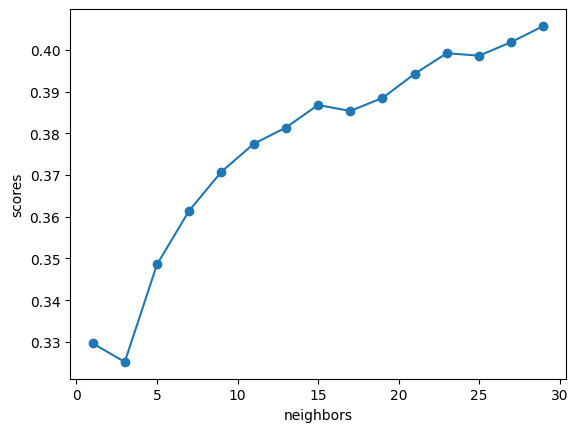

In [32]:
scores = []
k_vals = []
for i in range(1,30,2):
  model = KNeighborsClassifier(i)
  model.fit(X_train,Y_train)
  preds = model.predict(X_test)
  score = f1_score(Y_test,preds,average='weighted')
  scores.append(score)
  k_vals.append(i)

plt.plot(k_vals,scores,marker='o')
plt.xlabel('neighbors')
plt.ylabel('scores')
plt.show()